# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree model is able
to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range
of feature values seen during the training.

We first load the regression data.

In [4]:
import pandas as pd

In [8]:
penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"

X_train, y_train = penguins[[feature_name]], penguins[target_name]

In [9]:
print(X_train, y_train)

     Flipper Length (mm)
0                  181.0
1                  186.0
2                  195.0
3                  193.0
4                  190.0
..                   ...
337                207.0
338                202.0
339                193.0
340                210.0
341                198.0

[342 rows x 1 columns] 0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
337    4000.0
338    3400.0
339    3775.0
340    4100.0
341    3775.0
Name: Body Mass (g), Length: 342, dtype: float64


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at 3
levels for the decision tree.

In [12]:
# Write your code here.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the
minimum to the maximum of the training dataset. Get the predictions of each
model using this dataset.

In [14]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(
    np.arange(X_train[feature_name].min(), X_train[feature_name].max()),
    columns=[feature_name]
)

data_test.head()

,Flipper Length (mm)
0,172.0
1,173.0
2,174.0
3,175.0
4,176.0


Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

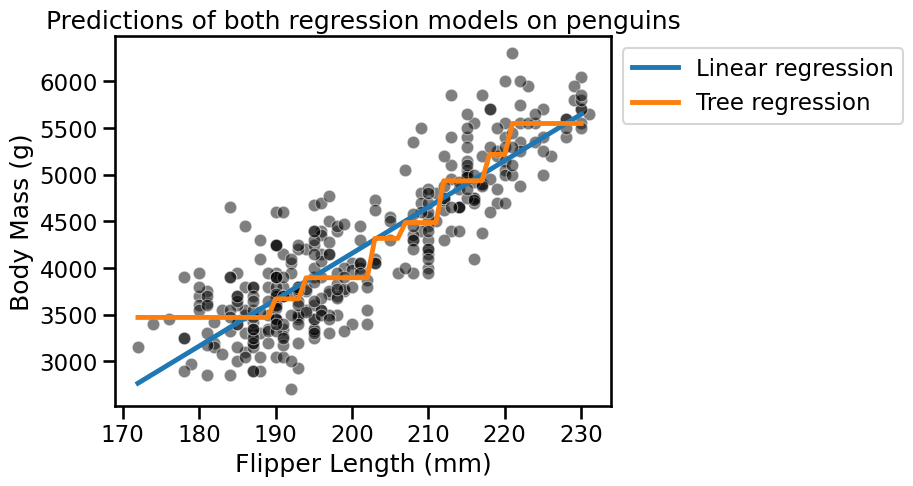

In [27]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

# obtain new predictions
linear_predict = linear_regressor.predict(data_test)
tree_predict = tree_regressor.predict(data_test)

# plot training observations
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)

# plot model predictions
plt.plot(data_test[feature_name], linear_predict, label="Linear regression")
plt.plot(data_test[feature_name], tree_predict, label="Tree regression")

# additional features of plot
_ = plt.title("Predictions of both regression models on penguins")
_ = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

The predictions that we got were within the range of feature values seen
during training. In some sense, we observe the capabilities of our model to
interpolate.

Now, we check the extrapolation capabilities of each model. Create a dataset
containing a broader range of values than your previous dataset, in other
words, add values below and above the minimum and the maximum of the flipper
length seen during training.

In [29]:
# Write your code here.
offset = 30
data_test = pd.DataFrame(
    np.arange(
        X_train[feature_name].min() - offset,
        X_train[feature_name].max() + offset,
    ),
    columns=[feature_name],
)

data_test.head()

,Flipper Length (mm)
0,142.0
1,143.0
2,144.0
3,145.0
4,146.0


Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

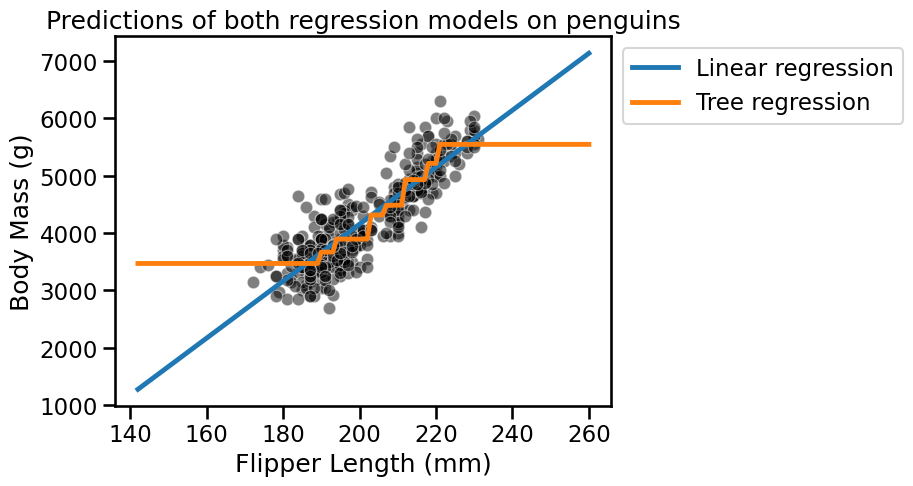

In [30]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

# obtain new predictions
linear_predict = linear_regressor.predict(data_test)
tree_predict = tree_regressor.predict(data_test)

# plot training observations
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)

# plot model predictions
plt.plot(data_test[feature_name], linear_predict, label="Linear regression")
plt.plot(data_test[feature_name], tree_predict, label="Tree regression")

# additional features of plot
_ = plt.title("Predictions of both regression models on penguins")
_ = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

The linear model extrapolates using the fitted model for flipper lengths < 175
mm and > 235 mm. In fact, we are using the model parametrization to make these
predictions.

As mentioned, decision trees are non-parametric models and we observe that
they cannot extrapolate. For flipper lengths below the minimum, the mass of
the penguin in the training data with the shortest flipper length will always
be predicted. Similarly, for flipper lengths above the maximum, the mass of
the penguin in the training data with the longest flipper will always be
predicted.